Code <span class="caret"></span>

-   <a href="#" id="rmd-show-all-code">Show All Code</a>
-   <a href="#" id="rmd-hide-all-code">Hide All Code</a>
-   
-   <a href="#" id="rmd-download-source">Download Rmd</a>

# R Notebook

``` r
# Analyzing Trend and Seasonal Variation Notebook - 2
```

``` r
# Install and load required packages
install.packages("tidyverse")
library(tidyverse)
```

``` r
# Importing the Unemployment: Maine data set
data.unemploy <- Maine
data.unemploy
```

``` r
# Checking the class of the data
class(data.unemploy) # It is a data frame
```

    [1] "data.frame"

``` r
# Converting to time series data
data.unemploy.month.ts = ts(data.unemploy, start = c(1996,1), frequency = 12 )
class(data.unemploy.month.ts) # Successfully converted to time series data
```

    [1] "ts"

``` r
# Checking Basic properties of the data
start(data.unemploy.month.ts)
```

    [1] 1996    1

``` r
end(data.unemploy.month.ts)
```

    [1] 2006    8

``` r
frequency(data.unemploy.month.ts)
```

    [1] 12

``` r
summary(data.unemploy.month.ts)
```

        unemploy    
     Min.   :2.500  
     1st Qu.:4.000  
     Median :4.400  
     Mean   :4.477  
     3rd Qu.:4.900  
     Max.   :6.700  

``` r
# Converting Monthly Data to Annual Data
data.unemploy.annual.ts = aggregate(data.unemploy.month.ts)/12
data.unemploy.annual.ts
```

    Time Series:
    Start = 1996 
    End = 2005 
    Frequency = 1 
          unemploy
     [1,] 5.258333
     [2,] 5.125000
     [3,] 4.508333
     [4,] 3.950000
     [5,] 3.275000
     [6,] 3.733333
     [7,] 4.341667
     [8,] 4.991667
     [9,] 4.616667
    [10,] 4.841667

``` r
# Observing Monthly and Yearly trend of unemployment
layout(1:2)
plot(data.unemploy.month.ts, ylab = 'Monthly Unemployment Trend', col = 'blue')
plot(data.unemploy.annual.ts, ylab = 'Yearly Unemployment Trend', col = 'red')
```

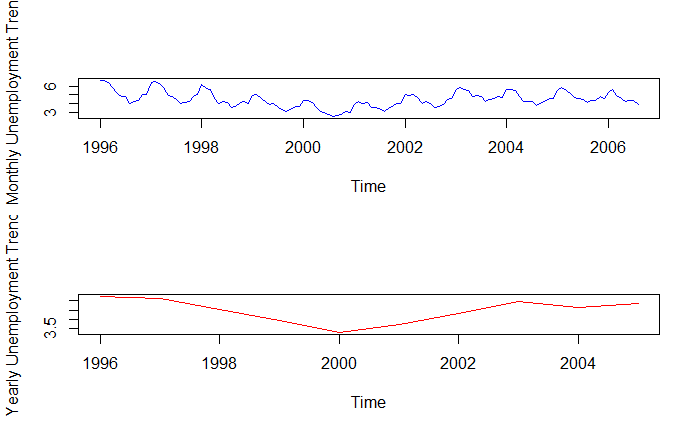

``` r
# Extracting time series data; extracting sub sets of data

# Extracting data for February Month
data.unemploy.feb = window(data.unemploy.month.ts, start = c(1996,2), freq = T)
data.unemploy.aug = window(data.unemploy.month.ts, start = c(1996,8), freq = T)
```

``` r
# Getting the data for february
data.unemploy.feb
```

    Time Series:
    Start = 1996.083 
    End = 2006.083 
    Frequency = 1 
          unemploy
     [1,]      6.7
     [2,]      6.5
     [3,]      5.7
     [4,]      5.0
     [5,]      4.4
     [6,]      4.2
     [7,]      4.9
     [8,]      5.8
     [9,]      5.6
    [10,]      5.8
    [11,]      5.6

``` r
# Getting data for August
data.unemploy.aug
```

    Time Series:
    Start = 1996.583 
    End = 2006.583 
    Frequency = 1 
          unemploy
     [1,]      4.0
     [2,]      4.0
     [3,]      3.6
     [4,]      3.3
     [5,]      2.5
     [6,]      3.1
     [7,]      3.6
     [8,]      4.3
     [9,]      3.8
    [10,]      4.1
    [11,]      3.9

``` r
# Unemployment Ratio for Month of February
feb.ratio = mean(data.unemploy.feb)/mean(data.unemploy.month.ts)
feb.ratio
```

    [1] 1.222529

``` r
# Unemployment Ratio for Month of August
aug.ratio = mean(data.unemploy.aug)/mean(data.unemploy.month.ts)
aug.ratio
```

    [1] 0.8163732

LS0tDQp0aXRsZTogIlIgTm90ZWJvb2siDQpvdXRwdXQ6IGh0bWxfbm90ZWJvb2sNCi0tLQ0KDQpgYGB7cn0NCiMgICAgICAgICAgICAgICAgICAgQW5hbHl6aW5nIFRyZW5kIGFuZCBTZWFzb25hbCBWYXJpYXRpb24gTm90ZWJvb2sgLSAyDQpgYGANCg0KYGBge3J9DQojIEluc3RhbGwgYW5kIGxvYWQgcmVxdWlyZWQgcGFja2FnZXMNCmluc3RhbGwucGFja2FnZXMoInRpZHl2ZXJzZSIpDQpsaWJyYXJ5KHRpZHl2ZXJzZSkNCmBgYA0KDQpgYGB7cn0NCiMgSW1wb3J0aW5nIHRoZSBVbmVtcGxveW1lbnQ6IE1haW5lIGRhdGEgc2V0DQpkYXRhLnVuZW1wbG95IDwtIE1haW5lDQpkYXRhLnVuZW1wbG95DQpgYGANCmBgYHtyfQ0KIyBDaGVja2luZyB0aGUgY2xhc3Mgb2YgdGhlIGRhdGENCmNsYXNzKGRhdGEudW5lbXBsb3kpICMgSXQgaXMgYSBkYXRhIGZyYW1lDQoNCiMgQ29udmVydGluZyB0byB0aW1lIHNlcmllcyBkYXRhDQpkYXRhLnVuZW1wbG95Lm1vbnRoLnRzID0gdHMoZGF0YS51bmVtcGxveSwgc3RhcnQgPSBjKDE5OTYsMSksIGZyZXF1ZW5jeSA9IDEyICkNCmNsYXNzKGRhdGEudW5lbXBsb3kubW9udGgudHMpICMgU3VjY2Vzc2Z1bGx5IGNvbnZlcnRlZCB0byB0aW1lIHNlcmllcyBkYXRhDQpgYGANCmBgYHtyfQ0KIyBDaGVja2luZyBCYXNpYyBwcm9wZXJ0aWVzIG9mIHRoZSBkYXRhDQpzdGFydChkYXRhLnVuZW1wbG95Lm1vbnRoLnRzKQ0KZW5kKGRhdGEudW5lbXBsb3kubW9udGgudHMpDQpmcmVxdWVuY3koZGF0YS51bmVtcGxveS5tb250aC50cykNCnN1bW1hcnkoZGF0YS51bmVtcGxveS5tb250aC50cykNCmBgYA0KYGBge3J9DQojIENvbnZlcnRpbmcgTW9udGhseSBEYXRhIHRvIEFubnVhbCBEYXRhDQpkYXRhLnVuZW1wbG95LmFubnVhbC50cyA9IGFnZ3JlZ2F0ZShkYXRhLnVuZW1wbG95Lm1vbnRoLnRzKS8xMg0KZGF0YS51bmVtcGxveS5hbm51YWwudHMNCmBgYA0KYGBge3J9DQojIE9ic2VydmluZyBNb250aGx5IGFuZCBZZWFybHkgdHJlbmQgb2YgdW5lbXBsb3ltZW50DQpsYXlvdXQoMToyKQ0KcGxvdChkYXRhLnVuZW1wbG95Lm1vbnRoLnRzLCB5bGFiID0gJ01vbnRobHkgVW5lbXBsb3ltZW50IFRyZW5kJywgY29sID0gJ2JsdWUnKQ0KcGxvdChkYXRhLnVuZW1wbG95LmFubnVhbC50cywgeWxhYiA9ICdZZWFybHkgVW5lbXBsb3ltZW50IFRyZW5kJywgY29sID0gJ3JlZCcpDQpgYGANCg0KYGBge3J9DQojIEV4dHJhY3RpbmcgdGltZSBzZXJpZXMgZGF0YTsgZXh0cmFjdGluZyBzdWIgc2V0cyBvZiBkYXRhDQoNCiMgRXh0cmFjdGluZyBkYXRhIGZvciBGZWJydWFyeSBNb250aA0KZGF0YS51bmVtcGxveS5mZWIgPSB3aW5kb3coZGF0YS51bmVtcGxveS5tb250aC50cywgc3RhcnQgPSBjKDE5OTYsMiksIGZyZXEgPSBUKQ0KZGF0YS51bmVtcGxveS5hdWcgPSB3aW5kb3coZGF0YS51bmVtcGxveS5tb250aC50cywgc3RhcnQgPSBjKDE5OTYsOCksIGZyZXEgPSBUKQ0KYGBgDQoNCmBgYHtyfQ0KIyBHZXR0aW5nIHRoZSBkYXRhIGZvciBmZWJydWFyeQ0KZGF0YS51bmVtcGxveS5mZWINCmBgYA0KYGBge3J9DQojIEdldHRpbmcgZGF0YSBmb3IgQXVndXN0DQpkYXRhLnVuZW1wbG95LmF1Zw0KYGBgDQpgYGB7cn0NCiMgVW5lbXBsb3ltZW50IFJhdGlvIGZvciBNb250aCBvZiBGZWJydWFyeQ0KZmViLnJhdGlvID0gbWVhbihkYXRhLnVuZW1wbG95LmZlYikvbWVhbihkYXRhLnVuZW1wbG95Lm1vbnRoLnRzKQ0KZmViLnJhdGlvDQoNCiMgVW5lbXBsb3ltZW50IFJhdGlvIGZvciBNb250aCBvZiBBdWd1c3QNCmF1Zy5yYXRpbyA9IG1lYW4oZGF0YS51bmVtcGxveS5hdWcpL21lYW4oZGF0YS51bmVtcGxveS5tb250aC50cykNCmF1Zy5yYXRpbw0KYGBgDQo=